In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


<h2> <b><span style="color:orange"> 1. Load Dataset Cat & Dog</span></b></h2>

In [2]:
# Import libraries
# from keras.layers import Input, Lambda, Dense, Flatten
# from keras.models import Model
# from keras.applications.InceptionResNetV2 import InceptionResNetV2
# from keras.applications.InceptionResNetV2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# import numpy as np
# from glob import glob
import matplotlib.pyplot as plt

In [5]:
!pip install mat4py

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mat4py import loadmat

In [7]:
import cv2


In [8]:
# from mat4py import loadmat
data = loadmat('CatDog.mat')

In [9]:
# Extracting 'X', 'G', 'nx', and 'ny'
X = data['X']
Y = data['G']
nx = data['nx']
ny = data['ny']

In [10]:
# Convert lists X and Y to NumPy arrays
X = np.array(X)
Y = np.array(Y)

# Check the shapes of the NumPy arrays
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (4096, 242)
Shape of Y: (242,)


In [11]:
data.keys()

dict_keys(['X', 'G', 'nx', 'ny'])

<h2> <b><span style="color:orange"> 2. Preprocess Data</span></b></h2>

## 2.1 Scale data

In [12]:
# 1. Transpose the feature matrix 'X'
X_transposed = np.transpose(X)

In [13]:
# 2. Normalizing 'X' to the range [0, 1]
X_normalized = (X_transposed - np.min(X_transposed)) / (np.max(X_transposed) - np.min(X_transposed))

In [14]:
# 3. Reshaping 'X' to (n, 64, 64, 1) (batch size; width in pixels; height in pixels; color 1 = gray, 3 = rbg)
X_reshaped = X_normalized.reshape(-1, nx, ny, 1)

In [15]:

# 4. Converting to RGB scale (replicating the single channel to three channels)
X_rgb = np.concatenate([X_reshaped] * 3, axis=-1)


In [17]:
X_rgb.shape

(242, 64, 64, 3)

In [20]:
# 5. Transpose images (swapping height and width dimensions to rotate images by 90 degrees clockwise)
X_rotated = np.transpose(X_rgb, (0, 2, 1, 3))[:, ::1, :, :]

In [21]:
print("Original shape:", X.shape)
print("Transposed shape:", X_transposed.shape)
print("Normalized shape:", X_normalized.shape)
print("Reshaped shape:", X_reshaped.shape)
print("RGB shape:", X_rgb.shape)
print("Rotated shape:", X_rotated.shape)

Original shape: (4096, 242)
Transposed shape: (242, 4096)
Normalized shape: (242, 4096)
Reshaped shape: (242, 64, 64, 1)
RGB shape: (242, 64, 64, 3)
Rotated shape: (242, 64, 64, 3)


In [27]:
# Redize X_rotated that are 64x64x3 images to 75x75x3 images
resized_images = []

for img in X_rotated:
    # Convert the image to uint8 format
    img_uint8 = np.uint8(img * 255)
    
    # Resize the image to 75x75 using OpenCV
    resized_img = cv2.resize(img_uint8, (75, 75), interpolation=cv2.INTER_AREA)
    
    # Normalize the resized image back to range [0, 1]
    resized_img = resized_img / 255.0
    
    # Append the resized image to the list
    resized_images.append(resized_img)

# Convert the list of resized images to a NumPy array
X_resized = np.array(resized_images)

In [28]:
print(X_resized.shape)

(242, 75, 75, 3)


<h2> <b><span style="color:orange"> 3. Discover and Visualize the Data to Gain Insights</span></b></h2>

In [29]:
# Reshape 'X_rotated' to have dimensions (64, 64, 3) and represents color images (RGB)
images = np.array(X_rotated).reshape(-1, nx, ny, 3)

<Axes: >

Text(0.5, 1.0, 'Cat')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog')

(-0.5, 63.5, 63.5, -0.5)

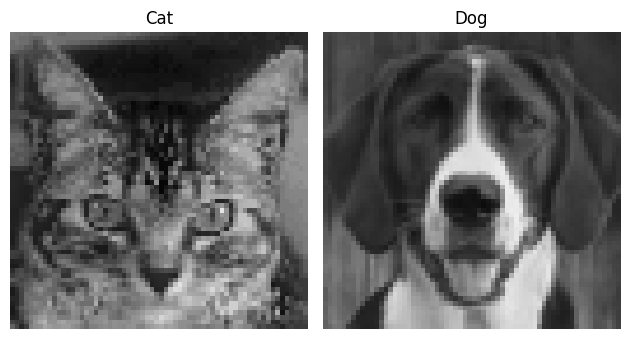

In [30]:
# Find indices for cat and dog image
cat_index = np.where(Y == 0)[0][0]  # 0 == a cat label
dog_index = np.where(Y== 1)[0][0]  # 1 == a dog label 

# Display cat and dog images
plt.subplot(1, 2, 1)
plt.imshow(images[cat_index]) 
# plt.imshow(images[cat_index], cmap='gray') 
plt.title("Cat")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(images[dog_index])
# plt.imshow(images[dog_index], cmap='gray')
plt.title("Dog")
plt.axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<Figure size 1000x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Cat 1')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Cat 2')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Cat 3')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Cat 4')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Cat 5')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 1')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 2')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 3')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 4')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 5')

(-0.5, 63.5, 63.5, -0.5)

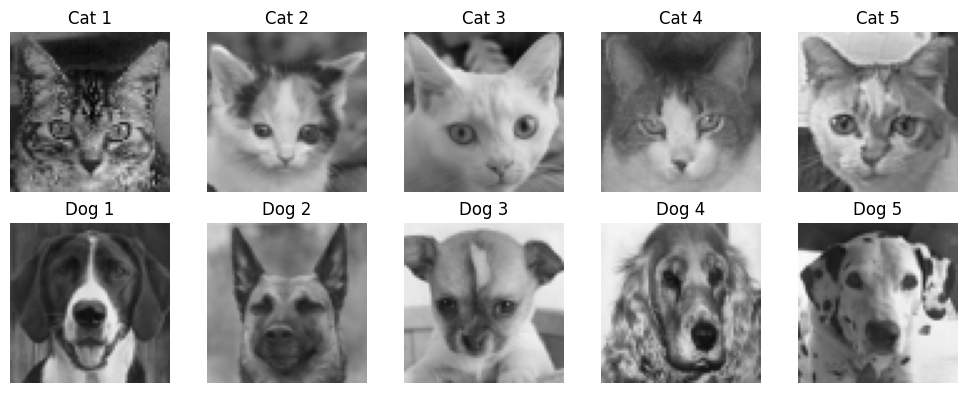

In [31]:
# Display the first 5 images of cats and dogs

# Find indices for cat and dog images
cat_indices = np.where(Y == 0)[0]  # 0 == a cat label
dog_indices = np.where(Y == 1)[0]  # 1 == a dog label

plt.figure(figsize=(10, 4))

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[cat_indices[i]], cmap='gray') 
    plt.title(f"Cat {i + 1}")
    plt.axis('off')

for i in range(5):
    plt.subplot(2, 5, 5 + i + 1)
    plt.imshow(images[dog_indices[i]], cmap='gray')
    plt.title(f"Dog {i + 1}")
    plt.axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<h2> <b><span style="color:orange"> 4. Train Test Split </span></b></h2>

In [32]:
print("Shape of X:", X_resized.shape)
print("Shape of Y:", Y.shape)

Shape of X: (242, 75, 75, 3)
Shape of Y: (242,)


In [33]:
# Reshape Y to match the number of samples in X
# Y = np.expand_dims(Y, axis=1)  # Adds a new axis to Y to match the number of samples in X

from sklearn.model_selection import train_test_split
# Perform the train-test split with updated Y
X_train, X_test, Y_train, Y_test = train_test_split(X_resized, Y, test_size=0.2, random_state=2)


In [97]:
print("Shape of X:", X_test.shape)
print("Shape of Y:", Y_test.shape)

Shape of X: (49, 75, 75, 3)
Shape of Y: (49,)


<h2> <b><span style="color:orange"> 5. Build model for prediction </span></b></h2>

In [34]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Activation
from keras.models import Model
from keras.layers import Input, BatchNormalization, Conv2D, Flatten, Dense, Dropout, Lambda
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.applications import InceptionResNetV2
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback
from keras.callbacks import Callback
from keras import metrics
from keras.optimizers import Adam 
from keras import backend as K
import tensorflow as tf

from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.inception_resnet_v2 import preprocess_input

In [139]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator to training data
datagen.fit(X_train)
augmented_generator = datagen.flow(X_train, Y_train, batch_size=32)

In [108]:
from tensorflow.keras import regularizers

def create_inceptionresnetv2_model(input_shape, n_out):
    base_model = InceptionResNetV2(
        include_top=False, 
        weights='imagenet', 
        input_shape=input_shape
    )
    
    # Freeze all layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Unfreeze the last layer
    base_model.layers[-1].trainable = True

    # Get the output of the base model
    base_model_output = base_model.output

    # Add dropout layer
    x = Dropout(0.1)(base_model_output)
    
    # Add batch normalization
    x = BatchNormalization()(x)

    # Flatten the output
    x = Flatten()(x)

    # Add a dense layer with L2 regularization
    x = Dense(1000, kernel_regularizer=regularizers.l2(0.01))(x)
    x = Activation('relu')(x)
   
    # Add output layer
    predictions = Dense(n_out, activation='sigmoid')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy' if n_out == 1 else 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

    

In [109]:
input_shape = (75, 75, 3)
output_class = 2

# Create the InceptionResNetV2-based model
inceptionresnetv2_model = create_inceptionresnetv2_model(input_shape=input_shape, n_out=output_class)

In [99]:
inceptionresnetv2_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 conv2d_1627 (Conv2D)        (None, 37, 37, 32)           864       ['input_16[0][0]']            
                                                                                                  
 batch_normalization_1638 (  (None, 37, 37, 32)           96        ['conv2d_1627[0][0]']         
 BatchNormalization)                                                                              
                                                                                                  
 activation_1631 (Activatio  (None, 37, 37, 32)           0         ['batch_normalization_16

In [100]:
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [141]:
Y_train = Y_train.squeeze()  # Ensure the labels are 1D
# Train the model
hist = inceptionresnetv2_model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
5/5 [==============================] - 1s 243ms/step - loss: 0.2978 - accuracy: 0.9870 - val_loss: 0.5905 - val_accuracy: 0.9231
Epoch 2/30
5/5 [==============================] - 1s 194ms/step - loss: 0.3037 - accuracy: 0.9675 - val_loss: 0.3528 - val_accuracy: 0.9744
Epoch 3/30
5/5 [==============================] - 1s 173ms/step - loss: 0.2484 - accuracy: 1.0000 - val_loss: 0.2589 - val_accuracy: 1.0000
Epoch 4/30
5/5 [==============================] - 1s 162ms/step - loss: 0.2580 - accuracy: 0.9935 - val_loss: 0.2746 - val_accuracy: 0.9744
Epoch 5/30
5/5 [==============================] - 1s 159ms/step - loss: 0.2326 - accuracy: 0.9935 - val_loss: 0.3061 - val_accuracy: 0.9744
Epoch 6/30
5/5 [==============================] - 1s 160ms/step - loss: 0.2398 - accuracy: 0.9805 - val_loss: 0.4308 - val_accuracy: 0.9231
Epoch 7/30
5/5 [==============================] - 1s 150ms/step - loss: 0.2063 - accuracy: 1.0000 - val_loss: 0.4581 - val_accuracy: 0.9231
Epoch 8/30
5/5 [====

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_custom_model(input_shape, n_out):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_out, activation='sigmoid'))  # Sigmoid for binary classification

    return model



In [92]:
input_shape = (75, 75, 3)
output_class = 1

custom_model = create_custom_model(input_shape=input_shape, n_out=output_class)
custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [93]:
custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1624 (Conv2D)        (None, 73, 73, 32)        896       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_1625 (Conv2D)        (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 17, 17, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_1626 (Conv2D)        (None, 15, 15, 128)       73856     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 7, 7, 128)         0

In [142]:
Y_train = Y_train.squeeze()  # Ensure the labels are 1D
# Train the model
hist3 = custom_model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
5/5 [==============================] - 0s 78ms/step - loss: 0.0842 - accuracy: 0.9610 - val_loss: 0.2991 - val_accuracy: 0.8205
Epoch 2/30
5/5 [==============================] - 0s 66ms/step - loss: 0.1239 - accuracy: 0.9481 - val_loss: 0.0925 - val_accuracy: 0.9744
Epoch 3/30
5/5 [==============================] - 0s 66ms/step - loss: 0.0740 - accuracy: 0.9805 - val_loss: 0.3436 - val_accuracy: 0.7692
Epoch 4/30
5/5 [==============================] - 0s 69ms/step - loss: 0.0643 - accuracy: 0.9740 - val_loss: 0.1006 - val_accuracy: 0.9487
Epoch 5/30
5/5 [==============================] - 0s 66ms/step - loss: 0.0363 - accuracy: 0.9870 - val_loss: 0.1411 - val_accuracy: 0.9487
Epoch 6/30
5/5 [==============================] - 0s 65ms/step - loss: 0.0548 - accuracy: 0.9805 - val_loss: 0.0717 - val_accuracy: 0.9487
Epoch 7/30
5/5 [==============================] - 0s 63ms/step - loss: 0.0643 - accuracy: 0.9805 - val_loss: 0.0749 - val_accuracy: 0.9744
Epoch 8/30
5/5 [===========

<h3> <b><span style="color:orange"> 6)	Evaluate model </span></b></h3>

In [143]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc


def fullEval(model_name, model, history, x_test, y_test):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Loss plot
    axs[0].plot(history.history['loss'], color='teal', label='loss')
    axs[0].plot(history.history['val_loss'], color='orange', label='val_loss')
    axs[0].set_title(f'Training Loss vs Validation Loss ({model_name})')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    # Accuracy plot
    axs[1].plot(history.history['accuracy'], color='teal', label='accuracy')
    axs[1].plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
    axs[1].set_title(f'Training Accuracy vs Validation Accuracy ({model_name})')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    print("Evaluation on test set for", model_name)
    loss, accuracy = model.evaluate(x_test, y_test)
    print("Loss:", loss)
    print("Accuracy:", accuracy)
    predictions = np.argmax(model.predict(x_test), axis=1)
    print("Classification Report of model:")
    print(classification_report(y_test, predictions))

    # Confusion matrix
    y_pred = model.predict(x_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()


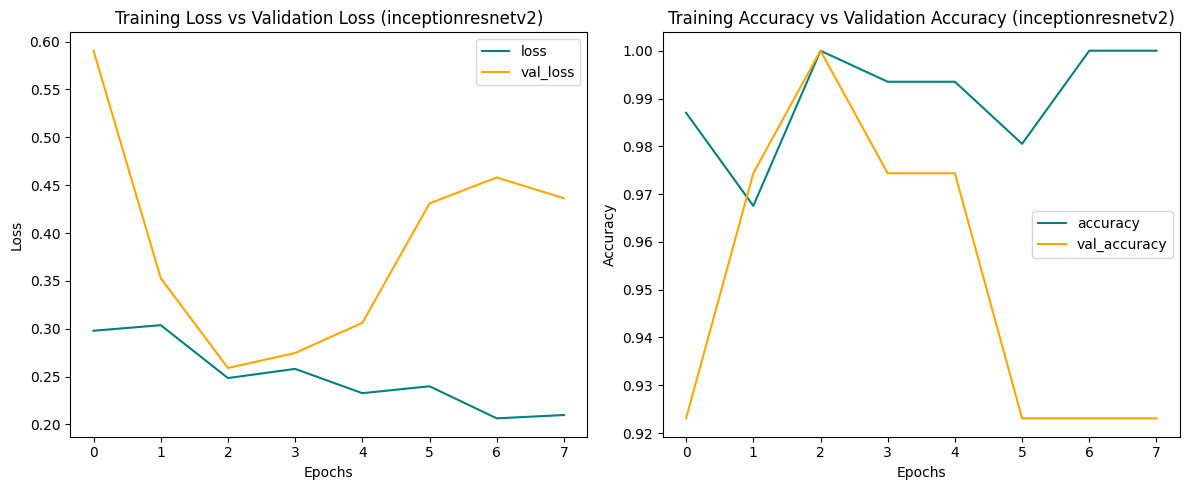

Evaluation on test set for inceptionresnetv2
2/2 [==============================] - 0s 76ms/step - loss: 0.4674 - accuracy: 0.9388
Loss: 0.4674213230609894
Accuracy: 0.9387755393981934
2/2 [==============================] - 0s 70ms/step
Classification Report of model:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.92      0.96      0.94        25

    accuracy                           0.94        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.94      0.94      0.94        49

2/2 [==============================] - 0s 77ms/step


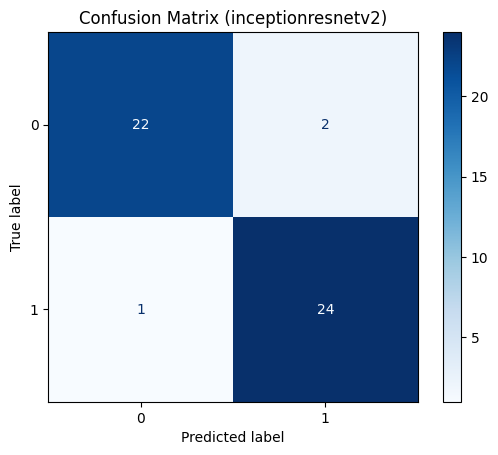

In [144]:
fullEval("inceptionresnetv2", inceptionresnetv2_model, hist, X_test, Y_test)

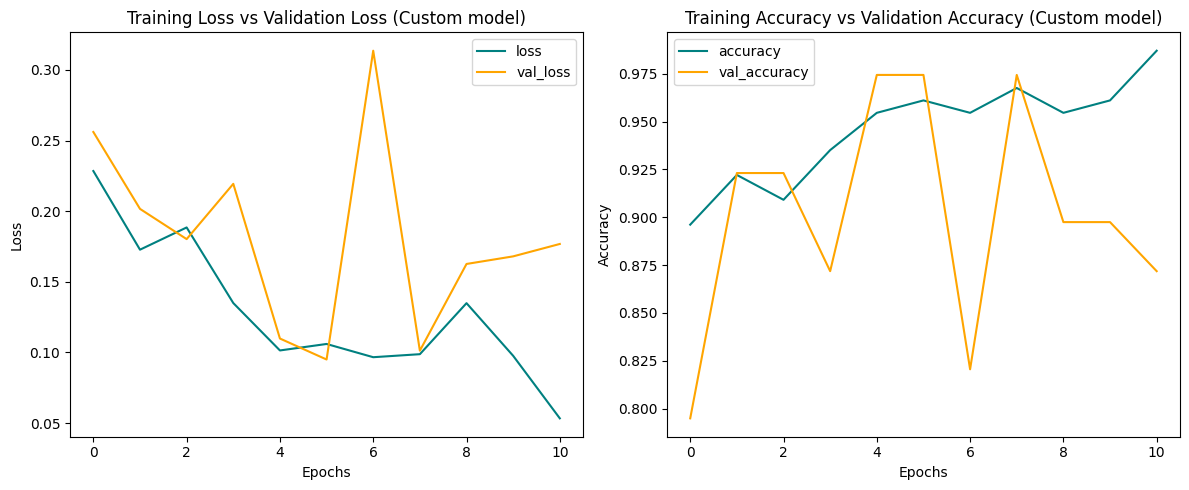

Evaluation on test set for Custom model
2/2 [==============================] - 0s 12ms/step - loss: 0.3535 - accuracy: 0.8163
Loss: 0.353534996509552
Accuracy: 0.8163265585899353
2/2 [==============================] - 0s 10ms/step
Classification Report of model:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        24
           1       0.00      0.00      0.00        25

    accuracy                           0.49        49
   macro avg       0.24      0.50      0.33        49
weighted avg       0.24      0.49      0.32        49

2/2 [==============================] - 0s 9ms/step


C:\Users\dpdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dpdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dpdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471

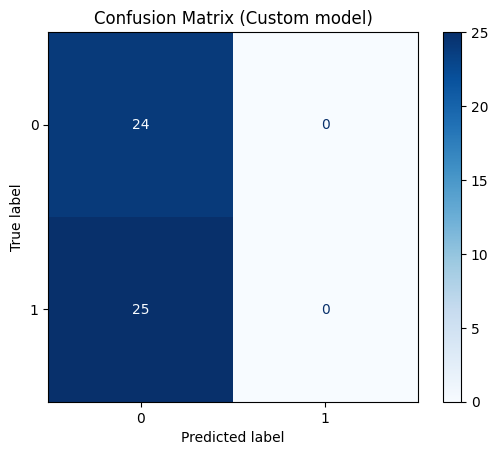

In [129]:
fullEval("Custom model", custom_model, hist3, X_test, Y_test)
# fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# # Loss plot
# axs[0].plot(hist3.history['loss'], color='teal', label='loss')
# axs[0].plot(hist3.history['val_loss'], color='orange', label='val_loss')
# axs[0].set_title('Loss', fontsize=15)
# axs[0].set_xlabel('Epochs')
# axs[0].set_ylabel('Loss')
# axs[0].legend()

# # Accuracy plot
# axs[1].plot(hist3.history['accuracy'], color='teal', label='accuracy')
# axs[1].plot(hist3.history['val_accuracy'], color='orange', label='val_accuracy')
# axs[1].set_title('Accuracy', fontsize=15)
# axs[1].set_xlabel('Epochs')
# axs[1].set_ylabel('Accuracy')
# axs[1].legend()

# plt.tight_layout()
# plt.show()

<h3> <b><span style="color:orange"> 7)	Use trained model to predict </span></b></h3>

Custom model prediction

1/1 [==============================] - 0s 19ms/step
Dog


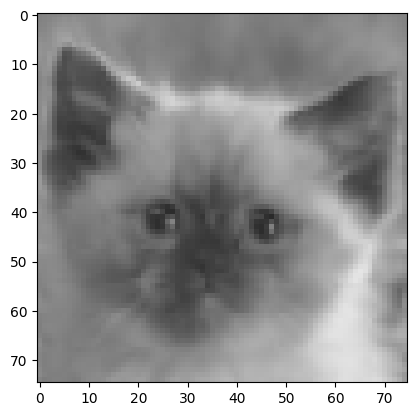

In [132]:
image_index = 2
plt.imshow(X_test[image_index].reshape(75, 75, 3))  # Display the image
pred = custom_model.predict(X_test[image_index].reshape(1, 75, 75, 3))  # Reshape to match input shape
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)

Inceptionresnetv2 prediction

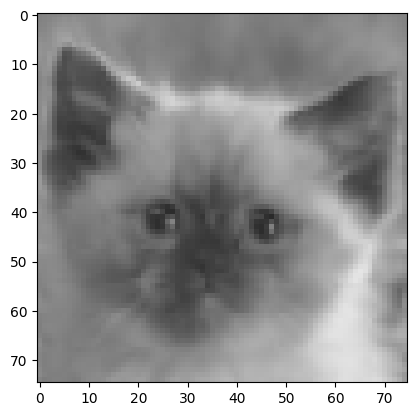

1/1 [==============================] - 0s 66ms/step
Cat


In [145]:
import matplotlib.pyplot as plt

# Display the image
image_index = 2
plt.imshow(X_test[image_index].reshape(75, 75, 3))
plt.show()

# Make a prediction
pred2 = inceptionresnetv2_model.predict(X_test[image_index].reshape(1, 75, 75, 3))

# Determine the label
if np.argmax(pred2) == 1:
    label = 'Dog'
else:
    label = 'Cat'

print(label)
